# Understanding Factors in Animal Shelter Pet Adoption - Data Wrangling

In efforts to understand trends in pet adoption outcomes, the Austin Animal Center has provided data relating to the pets in their adoption center. Understanding this data and using it to model the factors that influence pet adoption could lead to recommendations that improve the performance of the center and help more pets find homes.

### Objective

In this project I will be exploring the dataset and using various data wrangling techniques to prepare the data via basic data wrangling techniques in order to prepare the data for analysis. This will include the following steps:

   1. Loading the data and extracting general info and structure
   2. Verifying that data is tidy
   3. Identifying & dealing with missing values
   4. Identifying & dealing with outliers

### 1. Data Info and Structure

First I will start by loading the required packages, as well as the dataset which can be found **[here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238)**

**Note:** This dataset is updated hourly, and was accessed on Sunday, December 12th 2017 at 19:00 UTC for this project.

In [1]:
# For working with dataframes and manipulation
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Load the dataset locally
data = pd.read_csv('data/Austin_Animal_Center_Outcomes.csv')

In [3]:
# Display number of entries and features in the data
print('# of entries in this dataset: {0}'.format(data.shape[0]))
print('# of features per entry: {0}'.format(data.shape[1]))

# of entries in this dataset: 76133
# of features per entry: 12


In [4]:
# Display general information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76133 entries, 0 to 76132
Data columns (total 12 columns):
Animal ID           76133 non-null object
Name                52741 non-null object
DateTime            76133 non-null object
MonthYear           76133 non-null object
Date of Birth       76133 non-null object
Outcome Type        76123 non-null object
Outcome Subtype     35280 non-null object
Animal Type         76133 non-null object
Sex upon Outcome    76131 non-null object
Age upon Outcome    76123 non-null object
Breed               76133 non-null object
Color               76133 non-null object
dtypes: object(12)
memory usage: 7.0+ MB


There are a few details to mention here. Firstly we can see that within our 12 columns, there seem to be some missing entries in several of the columns, which may need to be addressed later on. In addition, all of the row types are classified as 'object', which can most likely be handled more efficiently if we are able to parse out specific types such as the 'DateTime' column. This column can be handled with much more functionality if we are able to convert it to a Datetime object in our dataframe.

In order to get more information, we will preview the first few rows of the data.

In [5]:
# Display first 10 entries
data.head(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
1,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
2,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray
3,A746650,Rose,04/07/2017 11:58:00 AM,04/07/2017 11:58:00 AM,04/06/2016,Return to Owner,NaN,Dog,Intact Female,1 year,Labrador Retriever/Jack Russell Terrier,Yellow
4,A750122,Happy Camper,05/24/2017 06:36:00 PM,05/24/2017 06:36:00 PM,04/08/2017,Transfer,Partner,Dog,Intact Male,1 month,Labrador Retriever Mix,Black
5,A756696,Shakti,09/01/2017 11:23:00 AM,09/01/2017 11:23:00 AM,08/24/2014,Return to Owner,NaN,Cat,Spayed Female,3 years,Domestic Shorthair Mix,Blue/White
6,A684346,NaN,07/22/2014 04:04:00 PM,07/22/2014 04:04:00 PM,07/07/2014,Transfer,Partner,Cat,Intact Male,2 weeks,Domestic Shorthair Mix,Orange Tabby
7,A666430,Lucy,11/07/2013 11:47:00 AM,11/07/2013 11:47:00 AM,11/06/2012,Transfer,Partner,Dog,Spayed Female,1 year,Beagle Mix,White/Brown
8,A675708,*Johnny,06/03/2014 02:20:00 PM,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White
9,A680386,Monday,06/15/2014 03:50:00 PM,06/15/2014 03:50:00 PM,06/02/2005,Transfer,Partner,Dog,Neutered Male,9 years,Miniature Schnauzer Mix,White


This table gives a much better look at what is going on in the data. Starting from the leftmost column are the following observations:

   1. **Animal ID** - This is a unique identifier for each entry that is a letter combined with a number. This seems well-formatted.
     
   2. **Name** - Some entries are missing here, and there are also some entries with asterisks before the names (e.g. \*Pebbles, \*Johnny). It will be useful if we can find out the meaning of the asterisk in this field.  
     
   3. **DateTime** and **MonthYear** - These columns look like datetime objects, but they look identical for the entries we see. If we verify that the columns are identical, we may be better served removing one.
     
   4. **Date of Birth** - This year may also be converted into a datetime object, so that we can perform time-series analysis with this information.
     
   5. **Outcome Type** - There are several categories in this column, and we may be able to convert the entries into categories for easier handling.
     
   6. **Outcome Subtype** - This has many missing entries, and we only see categories for Euthanasia and Transfer corresponding outcome types. Depending on the number of subtypes for these types, it may be more efficient to integrate them into the outcome type category.
     
   7. **Animal Type** - In addition to cats and dogs, there is an 'Other' category here in the third entry, corresponding to a 'Raccoon Mix' breed of animal. With the small amount of types of animals, this column is likely to perform better as categorical values.
     
   8. **Age upon Outcome** - If we are able to convert this into a uniform value (e.g. age in months) we can work with these values as numbers which will make analyzing this data easier. It should also be noted that if we work with the Outcome DateTime and Date of Birth columns as datetime objects, columns like this can be generated by arithmetic operations.
     
   9. **Breed** and **Color** - These columns look well-formatted, but more investigation is needed in order to determine whether they will perform better as categorical values, or what additional ways they can be transformed in order to yield more information.
   
### 2. Data Cleaning

We will first start with by looking at the 'Name' column of the data. We can look at the entries with asterisks first.

In [6]:
# Identify rows with names containing asterisks
asterisks = data.Name.str.contains('\*').fillna(False)

# Extract preview of rows with asterisks filter
data[asterisks].head(10)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
8,A675708,*Johnny,06/03/2014 02:20:00 PM,06/03/2014 02:20:00 PM,03/31/2013,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,Blue/White
12,A664462,*Edgar,10/07/2013 01:06:00 PM,10/07/2013 01:06:00 PM,06/03/2013,Transfer,Partner,Dog,Intact Male,4 months,Leonberger Mix,Brown/White
23,A692618,*Ella,12/08/2014 03:55:00 PM,12/08/2014 03:55:00 PM,11/23/2011,Transfer,Partner,Dog,Spayed Female,3 years,Chihuahua Shorthair Mix,Brown
29,A678580,*Frida,06/29/2014 05:45:00 PM,06/29/2014 05:45:00 PM,03/26/2014,Adoption,Offsite,Cat,Spayed Female,3 months,Domestic Shorthair Mix,White/Black
31,A757005,*Sandi,10/07/2017 01:15:00 PM,10/07/2017 01:15:00 PM,07/28/2017,Adoption,Foster,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Torbie/White
35,A720498,*Valentino,02/16/2016 12:00:00 AM,02/16/2016 12:00:00 AM,02/10/2014,Transfer,Partner,Dog,Neutered Male,2 years,Pug/Border Terrier,Black/Tan
37,A706392,*Ozzy,11/24/2015 11:58:00 AM,11/24/2015 11:58:00 AM,05/28/2015,Adoption,Foster,Cat,Neutered Male,5 months,Domestic Medium Hair Mix,Blue Tabby/White
50,A680396,*Truman,06/15/2014 03:11:00 PM,06/15/2014 03:11:00 PM,06/02/2012,Transfer,Partner,Dog,Neutered Male,2 years,Rat Terrier Mix,White/Black
52,A674298,*Newt,04/16/2014 12:51:00 PM,04/16/2014 12:51:00 PM,03/11/2013,Transfer,Partner,Dog,Neutered Male,1 year,Pit Bull Mix,Brown Brindle/White


From the data above, it looks like the Outcome Type for these entries is either adoption or transfer. This might give us more information, but we need to check further to verify if this is indeed the case.

In [7]:
# Show outcome types for all animals with asterisk names
data[asterisks]['Outcome Type'].unique()

array(['Adoption', 'Transfer', 'Return to Owner', 'Euthanasia', 'Died',
       'Missing', 'Rto-Adopt', nan, 'Disposal'], dtype=object)

It looks like asterisk values are included in many different outcome types. For now the names column can be used as-is, and can be investigated in more detail. I have also contacted the owner of the dataset and will update if I get a response.

Next up is the DateTime and MonthYear columns:

In [8]:
# Check if all values in the DateTime and MonthYear columns are 
(data.DateTime == data.MonthYear).value_counts()

True    76133
dtype: int64

Since these columns are identical, we can remove the MonthYear column for now.

In [9]:
# Remove MonthYear columnn from the dataset
data = data.drop('MonthYear', axis=1);

Now we can convert the 'DateTime' column into a datetime format. Since 'Date of Birth' needs this as well, we will perform this action on both columns.

In [10]:
# Convert DateTime and Date of Birth into datetime format
data['DateTime'] =  pd.to_datetime(data['DateTime'], format='%m/%d/%Y %I:%M:%S %p')
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'], format='%m/%d/%Y')

Next let's look at the outcome types and subtypes.

In [11]:
# Display number of occurences of outcome types
print('Outcome Types\n', data['Outcome Type'].value_counts())

# Display number of occurences of outcome subtypes
print('\nOutcome Subtypes\n', data['Outcome Subtype'].value_counts())

Outcome Types
 Adoption           32001
Transfer           23079
Return to Owner    13898
Euthanasia          5991
Died                 668
Disposal             303
Rto-Adopt            121
Missing               46
Relocate              16
Name: Outcome Type, dtype: int64

Outcome Subtypes
 Partner                19316
Foster                  5407
SCRP                    3211
Suffering               2477
Rabies Risk             2374
Snr                      542
Aggressive               505
Offsite                  363
In Kennel                338
Medical                  253
In Foster                177
Behavior                 142
At Vet                    57
Enroute                   44
Underage                  28
Court/Investigation       18
In Surgery                16
Possible Theft             9
Barn                       3
Name: Outcome Subtype, dtype: int64


It seems that there are too many subtypes to integrate into our outcome types column, but it should still be advantageous to convert these columns into categorical values.

In [12]:
# Convert columns to categorical entries
data['Outcome Type'] = pd.Categorical(data['Outcome Type'], ordered=False)
data['Outcome Subtype'] = pd.Categorical(data['Outcome Subtype'], ordered=False)

Similarly, the 'Animal Type' and 'Sex upon Outcome' columns should be considered as categorical features

In [13]:
# Display number of occurences of animal types
print('Animal Types\n', data['Animal Type'].value_counts())

# Display number of occurences of sex types
print('\nSex upon Outcome\n', data['Sex upon Outcome'].value_counts())

Animal Types
 Dog          42885
Cat          28741
Other         4171
Bird           327
Livestock        9
Name: Animal Type, dtype: int64

Sex upon Outcome
 Neutered Male    26962
Spayed Female    24423
Intact Male       9318
Intact Female     8942
Unknown           6486
Name: Sex upon Outcome, dtype: int64


In [14]:
# Convert columns to categorical entries
data['Animal Type'] = pd.Categorical(data['Animal Type'], ordered=False)
data['Sex upon Outcome'] = pd.Categorical(data['Sex upon Outcome'], ordered=False)

As previously discussed, we can calculate the outcome age of any animal in the table (with a bit more granularity than we were provided) by converting this column into a timedelta format.

In [15]:
# Replace age column with calculation from birthdate and outcome date
data['Age upon Outcome'] = pd.to_timedelta(data['DateTime'] - data['Date of Birth'])

Next we consider the breed and color columns:

In [16]:
# Display number of occurences of breeds
print('Breeds\n', data['Breed'].value_counts())

# Display number of occurences of animal colors
print('\nColors\n', data['Color'].value_counts())

Breeds
 Domestic Shorthair Mix                            22807
Pit Bull Mix                                       5935
Chihuahua Shorthair Mix                            4592
Labrador Retriever Mix                             4447
Domestic Medium Hair Mix                           2254
German Shepherd Mix                                1840
Bat Mix                                            1264
Domestic Longhair Mix                              1198
Australian Cattle Dog Mix                          1030
Siamese Mix                                         983
Bat                                                 789
Dachshund Mix                                       784
Boxer Mix                                           650
Miniature Poodle Mix                                626
Border Collie Mix                                   623
Catahoula Mix                                       459
Raccoon Mix                                         453
Australian Shepherd Mix                 

We can see that the list of breeds and colors are very long and many categories only have one entry. There are a few options to take here. First, for breeds, we can cut down the number of entries by reducing the number of mixed breed entries of the format 'breed/breed'.

In [17]:
# Print the number of distinct breeds found in the data
print('# of unique breeds in the original dataset: {0}'.format(len(data['Breed'].unique())))

# Print the number of mixed breeds with the format 'breed/breed'
print('# of mixed breeds classified by "breed/breed": {0}'.format(len(data[data['Breed'].str.contains('/')]['Breed'].unique())))

# Iterate over the list to find and replace all mixed breeds with 'first_breed/second_breed' to format 'first_breed Mix'
mixed_breeds = []

for breed in data['Breed']:
    if '/' in breed:
        mixed_breeds.append(breed.split('/')[0] + ' Mix')
    else:
        mixed_breeds.append(breed)

# Check to see whether the result is of appropriate length
assert len(mixed_breeds) == len(data['Breed'])        

# Replace 'Breed' data with reduced category set
data['Breed'] = pd.Series(mixed_breeds)

# Display the number of distinct breeds after replacement
print('# of unique breeds after replacement: {0}'.format(len(data['Breed'].unique())))

# of unique breeds in the original dataset: 2101
# of mixed breeds classified by "breed/breed": 1557
# of unique breeds after replacement: 547


Now we have significantly reduced the number of breed categories in the dataset. For the 'Color' categories, we may lose some important information that can be useful. For example, do white and orange cats get adopted more often than white and black cats? In order to keep as much information as possible, but provide some simpler avenues for analysis I will split the 'Color' column into 'Primary Color' and 'Secondary Color' values for the animals.

In [18]:
# Print the number of distinct colors found in the dataset
print('# of unique colors in the original dataset: {0}'.format(len(data['Color'].unique())))

# Print the number of mixed breeds with the format 'color/color'
print('# of mixed colors classified by "color/color": {0}'.format(len(data[data['Color'].str.contains('/')]['Color'].unique())))

# Iterate over the list to find and replace all mixed breeds with 'first_breed/second_breed' to format 'first_breed Mix'
primary_colors = []
secondary_colors = []

for color in data['Color']:
    if '/' in color:
        primary_colors.append(color.split('/')[0])
        secondary_colors.append(color.split('/')[1])
    else:
        primary_colors.append(color)
        secondary_colors.append(None)

# Check to see whether the result is of appropriate length
assert len(primary_colors) == len(data['Color'])
assert len(secondary_colors) == len(data['Color'])

# Replace 'Color' with 'Primary Color' and 'Secondary Color' data
data = data.drop('Color', axis=1)
data['Primary Color'] = pd.Series(primary_colors)
data['Secondary Color'] = pd.Series(secondary_colors)

# Display the number of distinct colors after replacement
print('# of unique colors after replacement: {0}'.format(len(pd.Series(primary_colors).unique())))
print('# of unique colors after replacement: {0}'.format(len(pd.Series(secondary_colors).unique())))

# of unique colors in the original dataset: 519
# of mixed colors classified by "color/color": 462
# of unique colors after replacement: 58
# of unique colors after replacement: 52


Now the number of color categories has been reduced to about 10% of its original number. Now we can re-check the values for these categories.

In [19]:
# Display number of occurences of breeds
print('Breeds\n', data['Breed'].value_counts())

# Display number of occurences of animal colors
print('\nPrimary Colors\n', data['Primary Color'].value_counts())

Breeds
 Domestic Shorthair Mix              22815
Pit Bull Mix                         6294
Labrador Retriever Mix               5632
Chihuahua Shorthair Mix              5267
Domestic Medium Hair Mix             2259
German Shepherd Mix                  2241
Australian Cattle Dog Mix            1281
Bat Mix                              1264
Domestic Longhair Mix                1205
Dachshund Mix                        1095
Siamese Mix                          1000
Border Collie Mix                     827
Boxer Mix                             821
Bat                                   789
Miniature Poodle Mix                  744
Catahoula Mix                         581
Australian Shepherd Mix               549
Jack Russell Terrier Mix              544
Yorkshire Terrier Mix                 531
Rat Terrier Mix                       529
Beagle Mix                            527
Miniature Schnauzer Mix               503
Siberian Husky Mix                    486
Raccoon Mix               

And finally we set these columns as categorical variables.

In [20]:
# Convert columns to categorical entries
data['Breed'] = pd.Categorical(data['Breed'], ordered=False)
data['Primary Color'] = pd.Categorical(data['Primary Color'], ordered=False)
data['Secondary Color'] = pd.Categorical(data['Secondary Color'], ordered=False)

Now that we have applied some formatting to each column, we can revisit the dataset information to get a summary of our results.

In [21]:
# Display number of entries and features in the formatted dataset
print('# of entries in this dataset: {0}'.format(data.shape[0]))
print('# of features per entry: {0}\n'.format(data.shape[1])) 

# Display formatted dataset information
data.info()

# of entries in this dataset: 76133
# of features per entry: 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76133 entries, 0 to 76132
Data columns (total 12 columns):
Animal ID           76133 non-null object
Name                52741 non-null object
DateTime            76133 non-null datetime64[ns]
Date of Birth       76133 non-null datetime64[ns]
Outcome Type        76123 non-null category
Outcome Subtype     35280 non-null category
Animal Type         76133 non-null category
Sex upon Outcome    76131 non-null category
Age upon Outcome    76133 non-null timedelta64[ns]
Breed               76133 non-null category
Primary Color       76133 non-null category
Secondary Color     39720 non-null category
dtypes: category(7), datetime64[ns](2), object(2), timedelta64[ns](1)
memory usage: 3.5+ MB


Not only is the data better formatted for analysis, but it also occupies less memory than before. After replacements, we ended up with the same number of features as before, though these features have a richer set of data for analysis.

### 3. Missing Values

Below are the columns with missing data:

In [22]:
# Identify columns with any missing values
NA_columns = data.columns[data.isnull().any()]

# Count missing entries in each column
NA_data_counts = data.isnull().sum()[NA_columns]

# Display columns and counts of missing entries
pd.DataFrame(data = NA_data_counts, columns = ['# of missing entries'])

,# of missing entries
Name,23392
Outcome Type,10
Outcome Subtype,40853
Sex upon Outcome,2
Secondary Color,36413


We can see that out of the 5 columns that contain missing entries, 'Outcome Subtype' and 'Secondary Color' have empty entries by necessity, since some outcome types do not have subclasses, and some animals do not have secondary colors. In addition, names may not be crucial to the other animal attributes, but it is crucial to keep records of animals with and without given names, since this fact may also influence the outcome type for that animal.

What is left are a handful of entries without outcome type, which is critical information that we are interested in, and without sex information. Since we are currently working with a dataset of more than 76,000 entries, we can remove these entries without any significant impact on our data.

In [23]:
# Remove entries from columns with missing data for either Outcome Type or Sex
data = data.dropna(subset=['Outcome Type', 'Sex upon Outcome'])

# Display columns and counts of missing entries
NA_columns = data.columns[data.isnull().any()]
NA_data_counts = data.isnull().sum()[NA_columns]
pd.DataFrame(data = NA_data_counts, columns = ['# of missing entries'])

,# of missing entries
Name,23386
Outcome Subtype,40842
Secondary Color,36405


### 4. Outliers

Although many outliers were corrected with the previous formatting, there are a few columns of interest in particular that I will address here, namely 'Animal Type', 'Outcome Type' and 'Outcome Subtype'.

First is Animal Type:

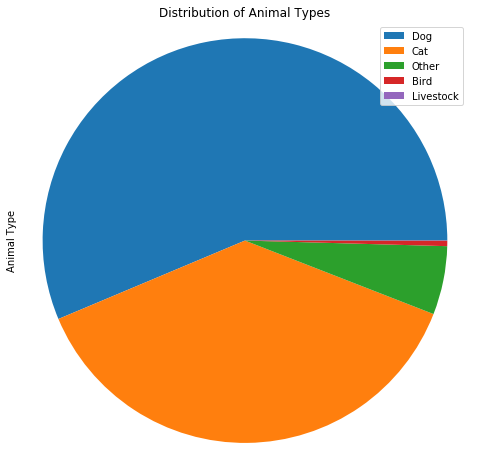

In [24]:
# Create a pie chart showing distribution of animal types
plt.figure(figsize=(8, 8))
data['Animal Type'].value_counts().plot(kind='pie',
                                        title='Distribution of Animal Types',
                                        labels=None,
                                        legend='Best'
                                       )
plt.axis('Equal')

# Display plot
plt.show()

There are mostly cats and dogs in this data, with the remaining animals of Bird, Livestock and Other types. We can look at these categories in more detail to see what kind of outcome data they contain:

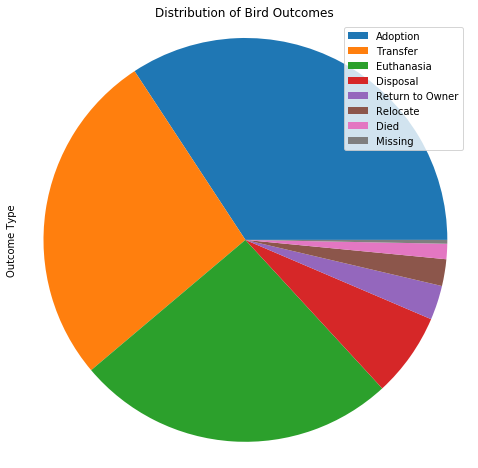

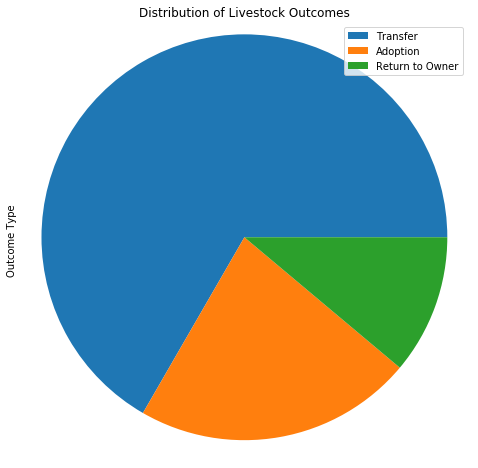

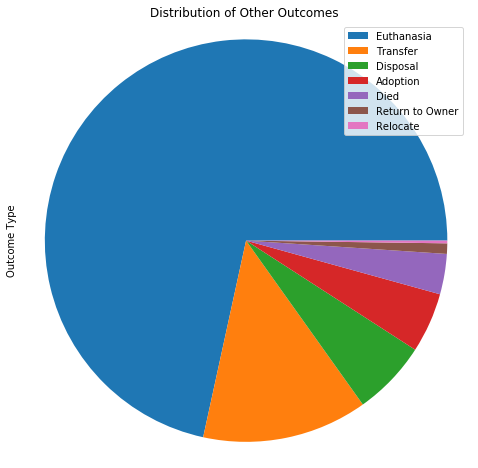

In [25]:
# Create a pie chart showing distribution of bird outcomes
plt.figure(figsize=(8, 8))
data[data['Animal Type'] == 'Bird']['Outcome Type'].value_counts()[:8].plot(kind='pie',
                                        title='Distribution of Bird Outcomes',
                                        labels=None,
                                        legend='Best'
                                       )
plt.axis('Equal')

# Create a pie chart showing distribution of livestock outcomes
plt.figure(figsize=(8, 8))
data[data['Animal Type'] == 'Livestock']['Outcome Type'].value_counts()[:3].plot(kind='pie',
                                        title='Distribution of Livestock Outcomes',
                                        labels=None,
                                        legend='Best'
                                       )
plt.axis('Equal')

# Create a pie chart showing distribution of 'other' outcomes
plt.figure(figsize=(8, 8))
data[data['Animal Type'] == 'Other']['Outcome Type'].value_counts()[:7].plot(kind='pie',
                                        title='Distribution of Other Outcomes',
                                        labels=None,
                                        legend='Best'
                                       )
plt.axis('Equal')

# Display plot
plt.show()

Although there is a much smaller number of entries for these categories, we can see that they each have a good distribution of outcomes, and so for now it will be best to keep these entries in the data for consideration.

Next we will look at Outcome types:

Outcome Types
 Adoption           32001
Transfer           23079
Return to Owner    13897
Euthanasia          5991
Died                 668
Disposal             303
Rto-Adopt            121
Missing               46
Relocate              16
Name: Outcome Type, dtype: int64


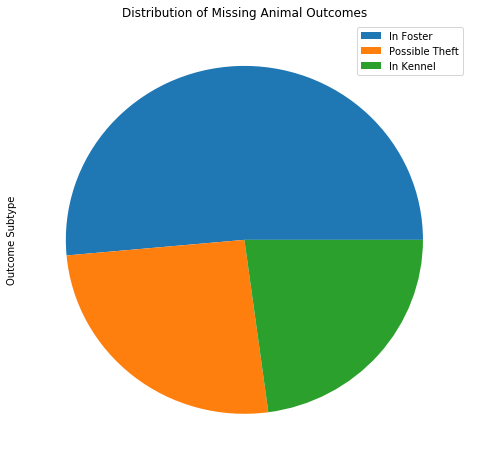

In [26]:
# Display occurences of outcome types
print('Outcome Types\n', data['Outcome Type'].value_counts())

# Create a pie chart showing distribution of outcome subtypes for missing animals
plt.figure(figsize=(8, 8))
data[data['Outcome Type'] == 'Missing']['Outcome Subtype'].value_counts()[:3].plot(kind='pie',
                                        title='Distribution of Missing Animal Outcomes',
                                        labels=None,
                                        legend='Best'
                                       )
# Display plot
plt.show()

In [27]:
data[data['Outcome Type'] == 'Relocate'].head(10)

,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Primary Color,Secondary Color
1963,A678645,NaN,2014-05-13 15:17:00,2012-05-11,Relocate,NaN,Other,Unknown,732 days 15:17:00,Raccoon Mix,Black,NaN
21783,A718875,NaN,2016-01-13 13:28:00,2015-01-08,Relocate,NaN,Bird,Unknown,370 days 13:28:00,Duck,White,Gray
28775,A676676,NaN,2014-04-14 16:35:00,2012-10-13,Relocate,NaN,Bird,Unknown,548 days 16:35:00,Duck,Brown,Tan
30431,A687222,NaN,2014-09-03 12:27:00,2014-03-02,Relocate,NaN,Other,Unknown,185 days 12:27:00,Opossum,Brown,White
31838,A736399,NaN,2016-10-11 10:22:00,2014-10-10,Relocate,NaN,Other,Intact Female,732 days 10:22:00,Raccoon,Black,Gray
33151,A748513,NaN,2017-05-03 11:28:00,2015-05-03,Relocate,NaN,Bird,Unknown,731 days 11:28:00,Crow Mix,Black,NaN
38196,A737965,NaN,2016-11-08 10:19:00,2016-05-07,Relocate,NaN,Other,Unknown,185 days 10:19:00,Raccoon,Brown,NaN
57390,A687250,NaN,2014-09-24 14:39:00,2014-03-02,Relocate,NaN,Other,Unknown,206 days 14:39:00,Raccoon Mix,Brown,Black
57429,A683134,NaN,2014-07-17 16:55:00,2014-06-07,Relocate,NaN,Other,Unknown,40 days 16:55:00,Raccoon Mix,Black,Gray
58657,A701725,NaN,2015-05-13 07:43:00,2014-11-03,Relocate,NaN,Bird,Unknown,191 days 07:43:00,Chicken,Black,NaN


Relocated animals do not have much associated information as shown in the table above, and so their removal may improve the analysis we can perform on other entries.

In addition, if the animals are missing, they in essence do not have an outcome that is likely to help us to determine how their features influenced the outcomes, so these rows will be removed.

In [28]:
# Remove entries from rows with missing and relocated outcome types
data = data[data['Outcome Type'] != 'Missing']
data = data[data['Outcome Type'] !='Relocate']
data['Outcome Type'].value_counts()

Adoption           32001
Transfer           23079
Return to Owner    13897
Euthanasia          5991
Died                 668
Disposal             303
Rto-Adopt            121
Relocate               0
Missing                0
Name: Outcome Type, dtype: int64

Finally, we can also classify the marginal subtypes as 'Other' in order to reduce the number of subtypes we are dealing with:

In [29]:
# Display number of occurences of outcome subtypes
print('Outcome Subtypes\n', data['Outcome Subtype'].value_counts())

Outcome Subtypes
 Partner                19316
Foster                  5407
SCRP                    3211
Suffering               2477
Rabies Risk             2374
Snr                      542
Aggressive               505
Offsite                  363
In Kennel                330
Medical                  253
In Foster                159
Behavior                 142
At Vet                    57
Enroute                   44
Underage                  28
Court/Investigation       18
In Surgery                16
Barn                       3
Possible Theft             0
Name: Outcome Subtype, dtype: int64


In [30]:
# Create list with subtypes that have less than 100 occurrences each
others = data['Outcome Subtype'].value_counts() < 100
others = others[others == True].index.astype(str)

# Convert Series back into string type temporarily for replacement
data['Outcome Subtype'] = data['Outcome Subtype'].astype(str)

# Initialize empty list and i for loop
i = 0
others_list = []

# replace categories with less than 100 occurences each with 'Other' subtype
for entry in data['Outcome Subtype'].isin(others):
    if entry == True:
        others_list.append('Other')
    elif data.iloc[i, 5] == 'nan':
        others_list.append(None)
    else:
        others_list.append(data.iloc[i, 5])
    i += 1
        
others_list = pd.Categorical(others_list, ordered = False)

# Merge replacements
data['Outcome Subtype'] = others_list

# Display occurrences of outcome subtypes after replacement
print(data['Outcome Subtype'].value_counts())

Partner        19316
Foster          5407
SCRP            3211
Suffering       2477
Rabies Risk     2374
Snr              542
Aggressive       505
Offsite          363
In Kennel        330
Medical          253
Other            166
In Foster        159
Behavior         142
Name: Outcome Subtype, dtype: int64


## Closing Remarks

In this project, the Austin Animal Center dataset was explored and prepared for analysis. By converting columns into their appropriate formatting, removing duplicate information, and correcting missing values/outliers where possible, the data can yield more information in analysis. This includes the dataset taking less space in memory to work more quickly, as well as having a richer set of data which we can probe.

### Thanks for Reading!